In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from sklearn.ensemble import AdaBoostClassifier

In [5]:
# dataset from kaggle about diabetes
df = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')
df

C:\Users\Muskan\AppData\Local\Temp\ipykernel_21044\788988348.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')


eventid  iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11   1970       7     2        NaN         0        NaN   
1       1.970000e+11   1970       0     0        NaN         0        NaN   
2       1.970010e+11   1970       1     0        NaN         0        NaN   
3       1.970010e+11   1970       1     0        NaN         0        NaN   
4       1.970010e+11   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  2.017120e+11   2017      12    31        NaN         0        NaN   
181687  2.017120e+11   2017      12    31        NaN         0        NaN   
181688  2.017120e+11   2017      12    31        NaN         0        NaN   
181689  2.017120e+11   2017      12    31        NaN         0        NaN   
181690  2.017120e+11   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      Na

In [7]:
# to print column names of our dataframe use .columns attribute
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.info() # information about dataset 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB
            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002704e+11    2002.638997       6.467277      15.505644   
std    1.325955e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991020e+11    1991.000000       4.000000       8.000000   
50%    2.009020e+11    2009.000000       6.000000      15.000000   
75%    2.014080e+11    2014.000000       9.000000      23.000000   
max    2.017120e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.4983

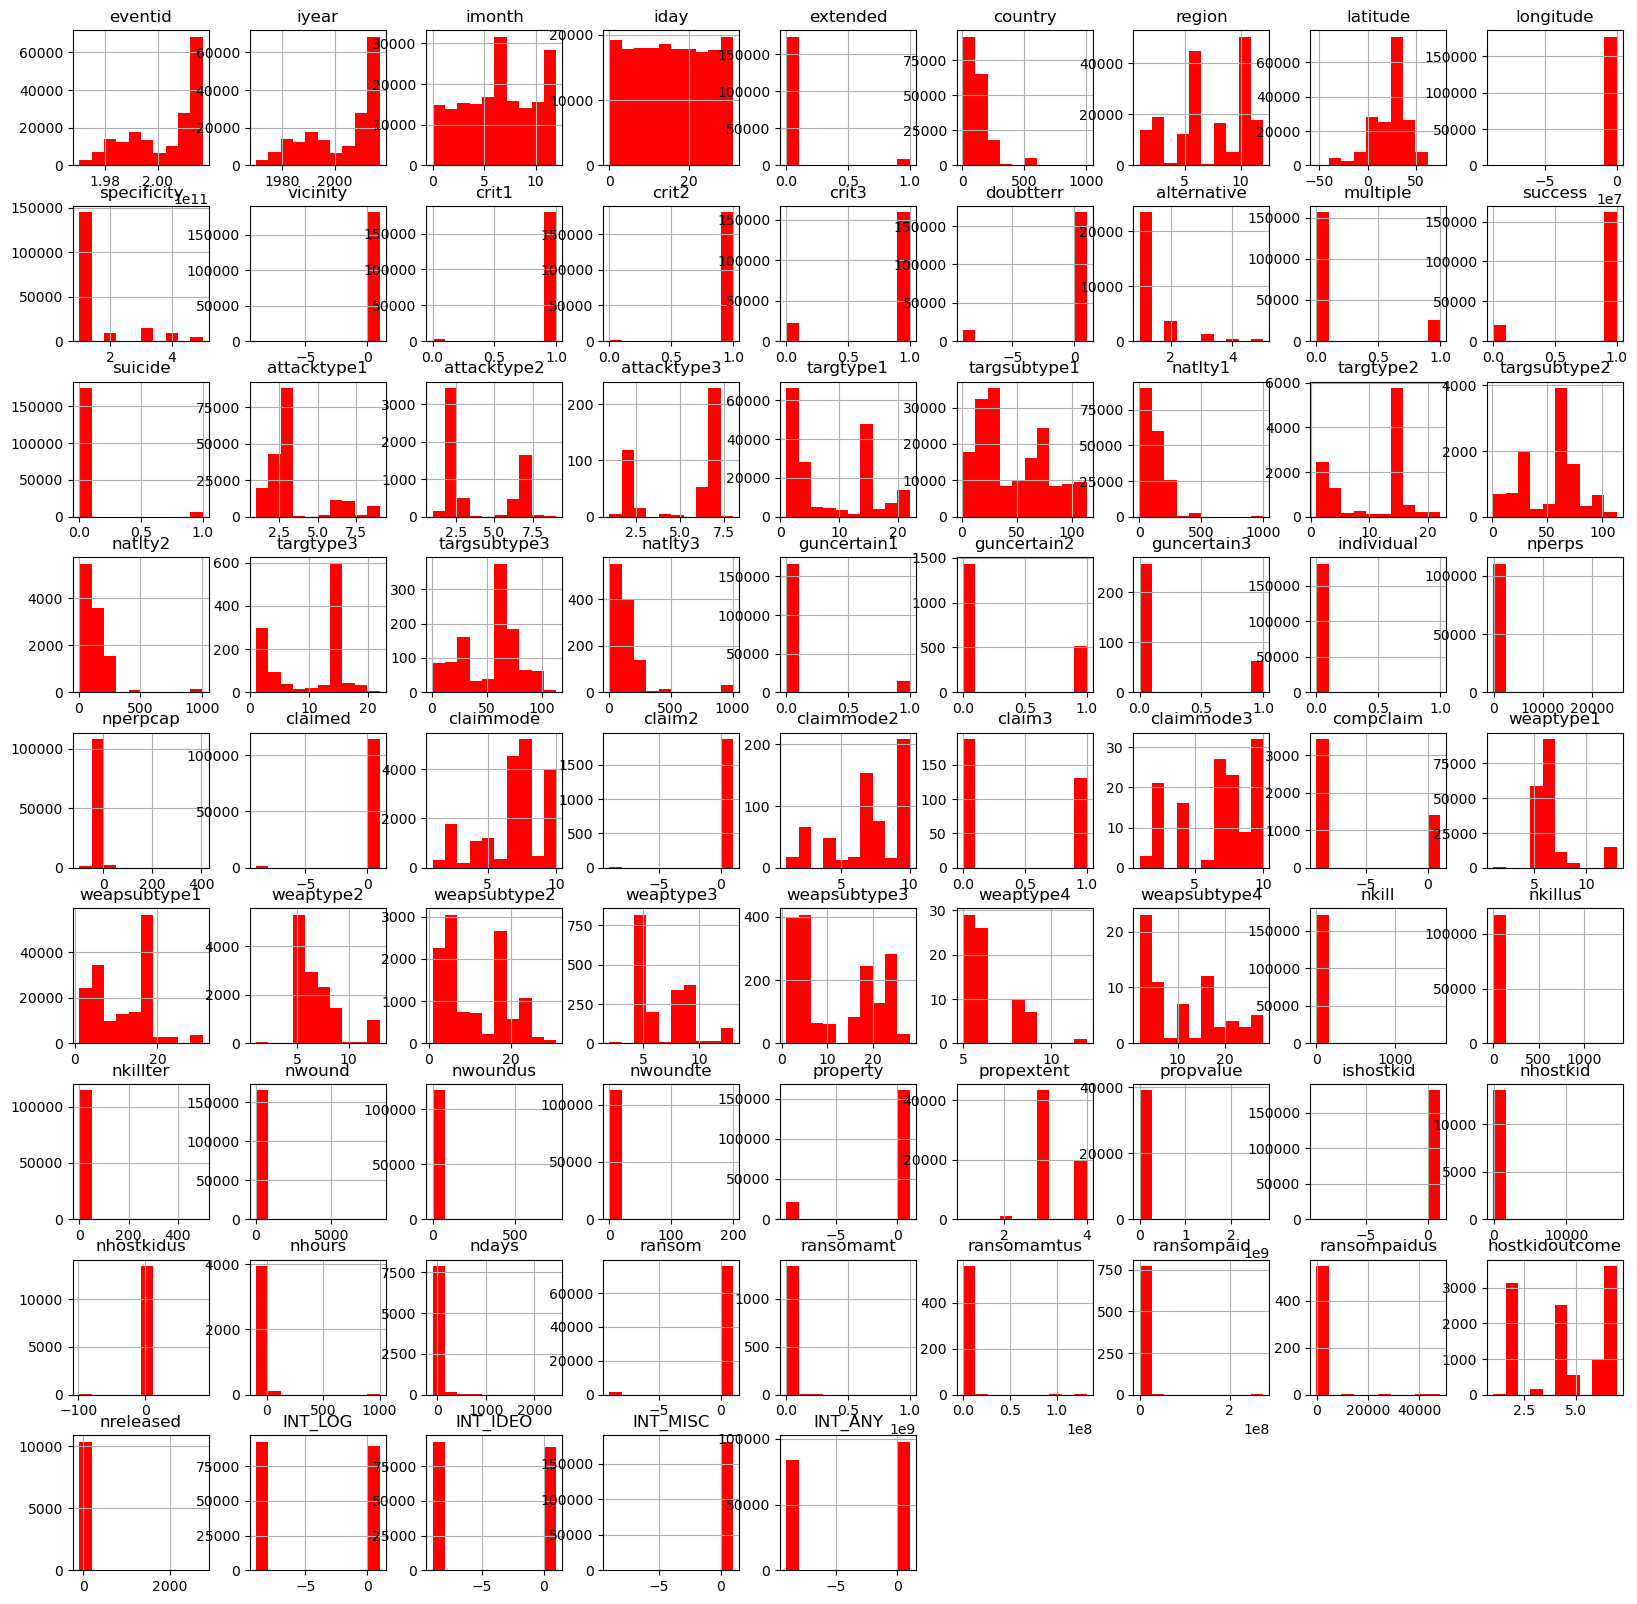

In [9]:
p = df.hist(figsize=(20, 20),color='red')

In [13]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

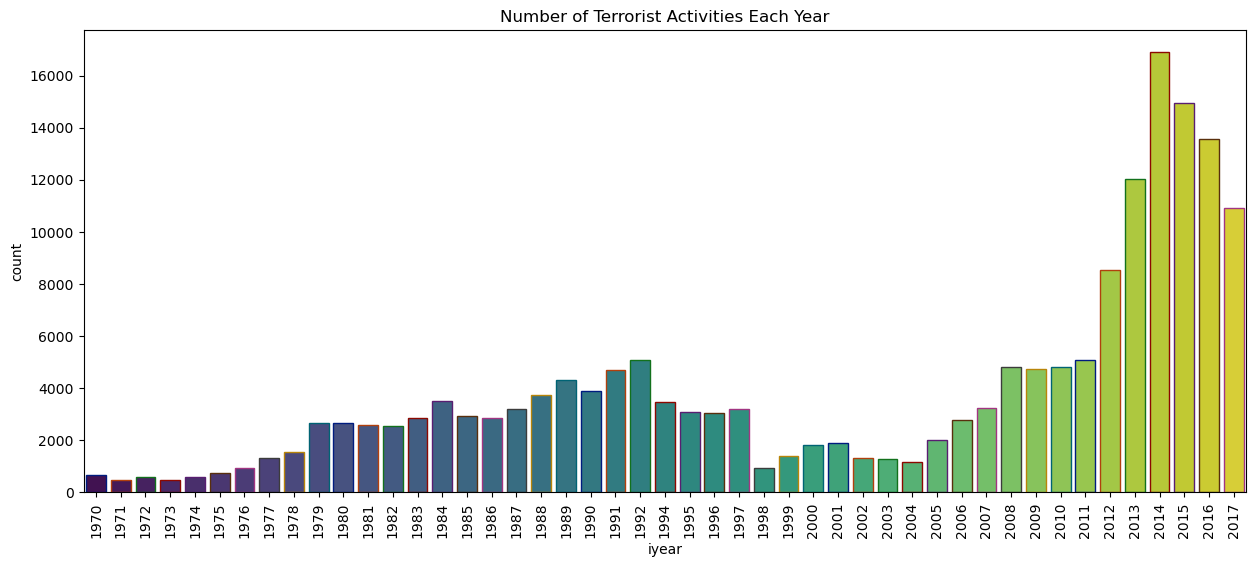

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a count plot with improved syntax and parameters
sns.countplot(x='iyear', data=df, palette="viridis", edgecolor=sns.color_palette('dark', 10))

# Rotate x-axis labels and add title
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')

# Display the plot
plt.show()

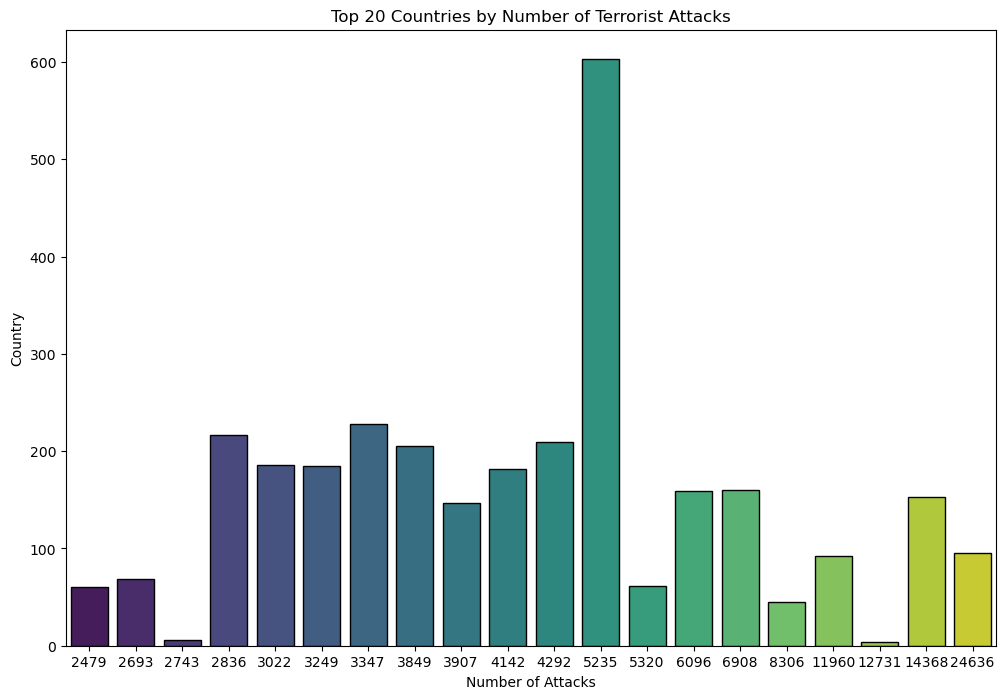

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 countries by number of attacks
top_countries = df['country'].value_counts().head(20)

# Set the figure size
plt.figure(figsize=(12, 8))

# Bar plot for the top 20 countries
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis", edgecolor='black')

# Add title and labels
plt.title('Top 20 Countries by Number of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')

# Display the plot
plt.show()

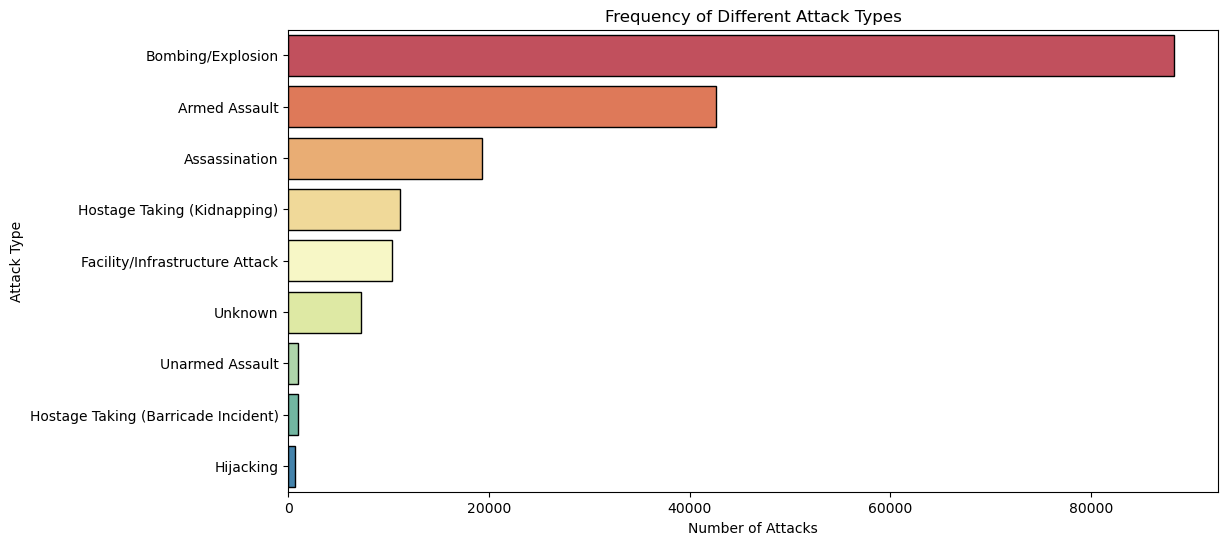

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(y='attacktype1_txt', data=df, order=df['attacktype1_txt'].value_counts().index, palette='Spectral', edgecolor='black')
plt.title('Frequency of Different Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

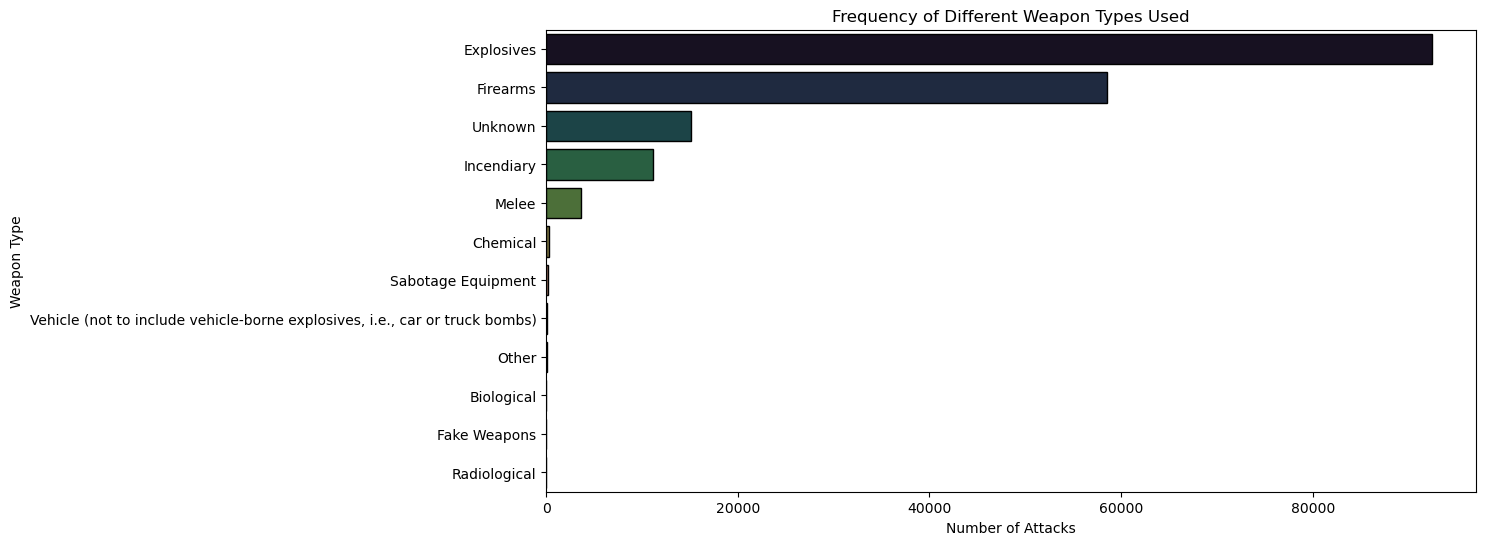

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(y='weaptype1_txt', data=df, order=df['weaptype1_txt'].value_counts().index, palette='cubehelix', edgecolor='black')
plt.title('Frequency of Different Weapon Types Used')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
plt.show()

C:\Users\Muskan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muskan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


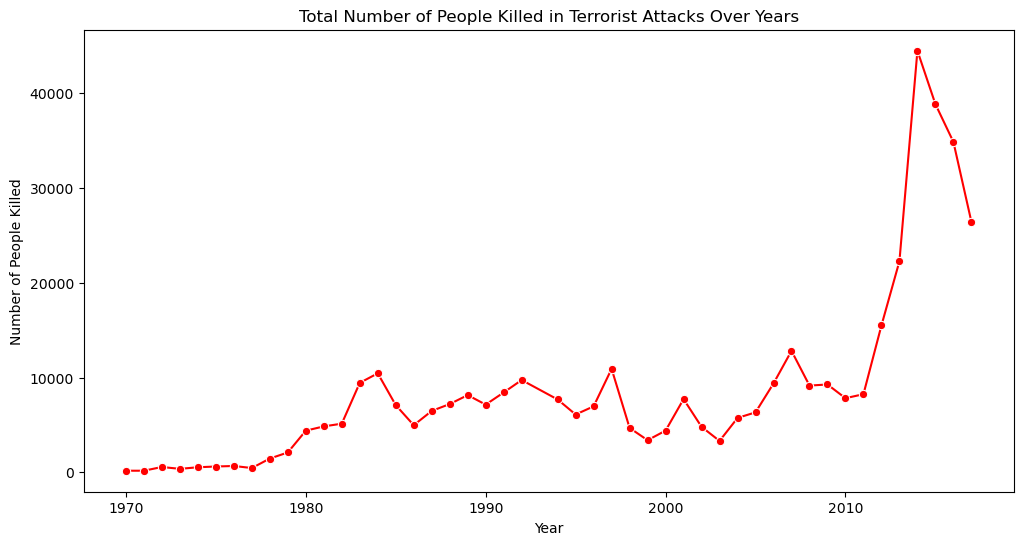

In [42]:
yearly_kills = df.groupby('iyear')['nkill'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_kills.index, y=yearly_kills.values, marker='o', color='red')
plt.title('Total Number of People Killed in Terrorist Attacks Over Years')
plt.xlabel('Year')
plt.ylabel('Number of People Killed')
plt.show()

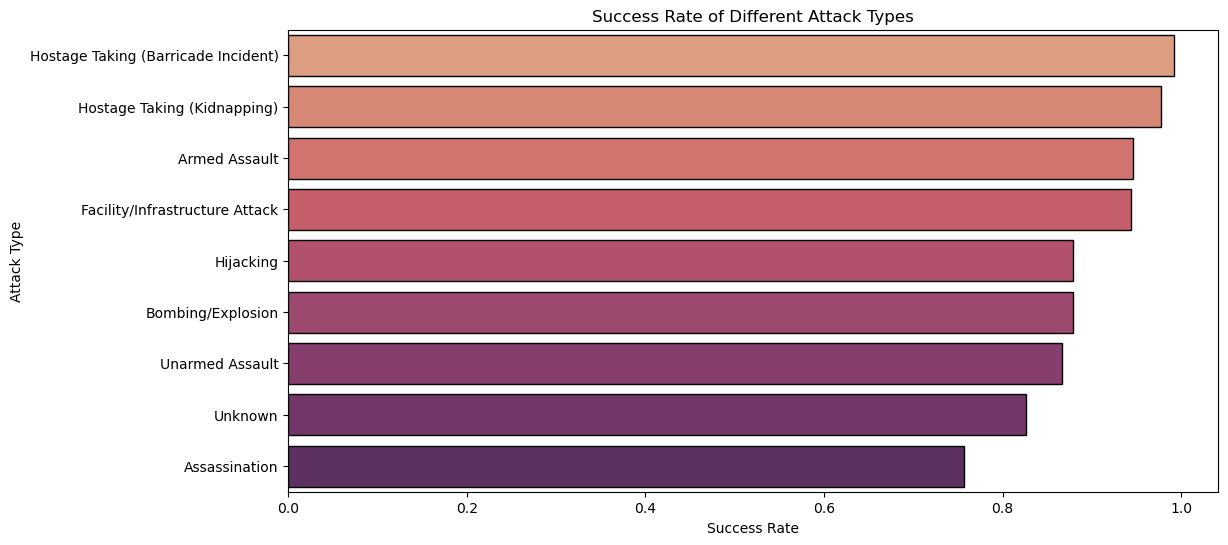

In [44]:
success_rate = df.groupby('attacktype1_txt')['success'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=success_rate.index, x=success_rate.values, palette='flare', edgecolor='black')
plt.title('Success Rate of Different Attack Types')
plt.xlabel('Success Rate')
plt.ylabel('Attack Type')
plt.show()

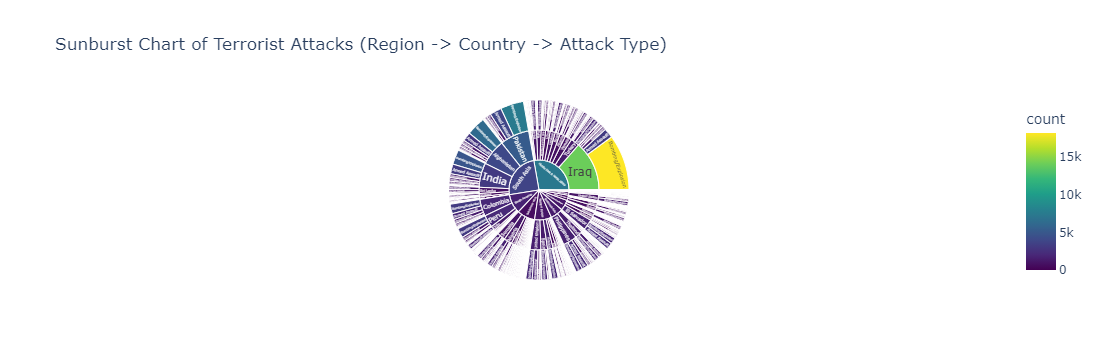

In [46]:
import plotly.express as px

# Creating a sample DataFrame for sunburst plot
sunburst_data = df.groupby(['region_txt', 'country_txt', 'attacktype1_txt']).size().reset_index(name='count')

# Sunburst plot
fig = px.sunburst(sunburst_data, path=['region_txt', 'country_txt', 'attacktype1_txt'], values='count', 
                  color='count', color_continuous_scale='Viridis', 
                  title='Sunburst Chart of Terrorist Attacks (Region -> Country -> Attack Type)')
fig.show()

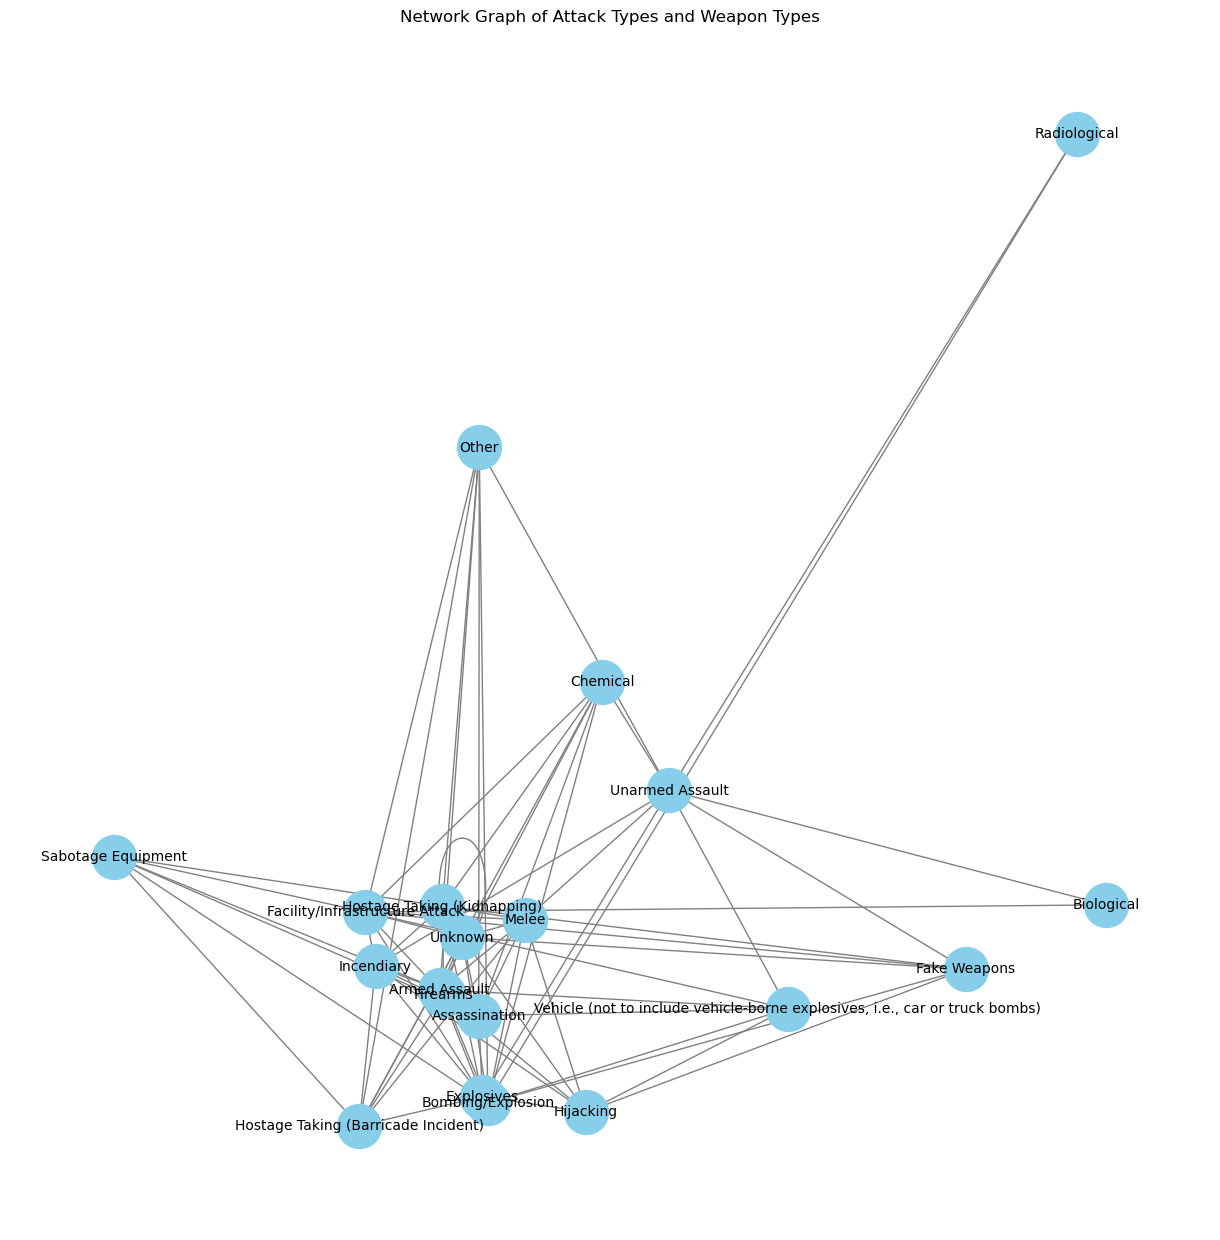

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample edges between attack types and weapon types
edges = df[['attacktype1_txt', 'weaptype1_txt']].dropna().value_counts().reset_index(name='weight')

# Create a directed graph
G = nx.from_pandas_edgelist(edges, source='attacktype1_txt', target='weaptype1_txt', edge_attr='weight')

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, node_color='skyblue', edge_color='grey')
plt.title('Network Graph of Attack Types and Weapon Types')
plt.show()

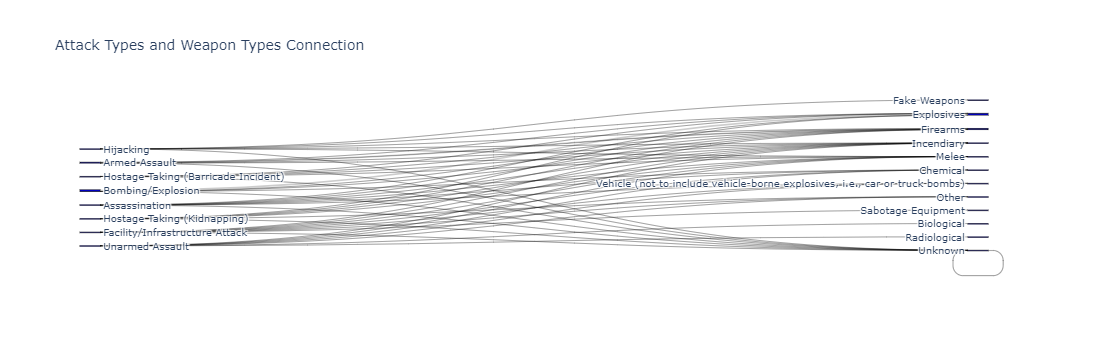

In [59]:
import plotly.graph_objects as go

# Prepare data for Sankey Diagram (similar to Chord Diagram)
attack_weapon = df.groupby(['attacktype1_txt', 'weaptype1_txt']).size().reset_index(name='count')
attack_weapon = attack_weapon[attack_weapon['count'] > 10]  # Filter for significant connections

# Create node labels and indices for Sankey
all_labels = list(attack_weapon['attacktype1_txt'].unique()) + list(attack_weapon['weaptype1_txt'].unique())
label_dict = {name: idx for idx, name in enumerate(all_labels)}

# Map source and target to their respective indices
attack_weapon['source'] = attack_weapon['attacktype1_txt'].map(label_dict)
attack_weapon['target'] = attack_weapon['weaptype1_txt'].map(label_dict)

# Build Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="blue"
    ),
    link=dict(
        source=attack_weapon['source'],
        target=attack_weapon['target'],
        value=attack_weapon['count']
    )
))

fig.update_layout(title_text="Attack Types and Weapon Types Connection", font_size=10)
fig.show()

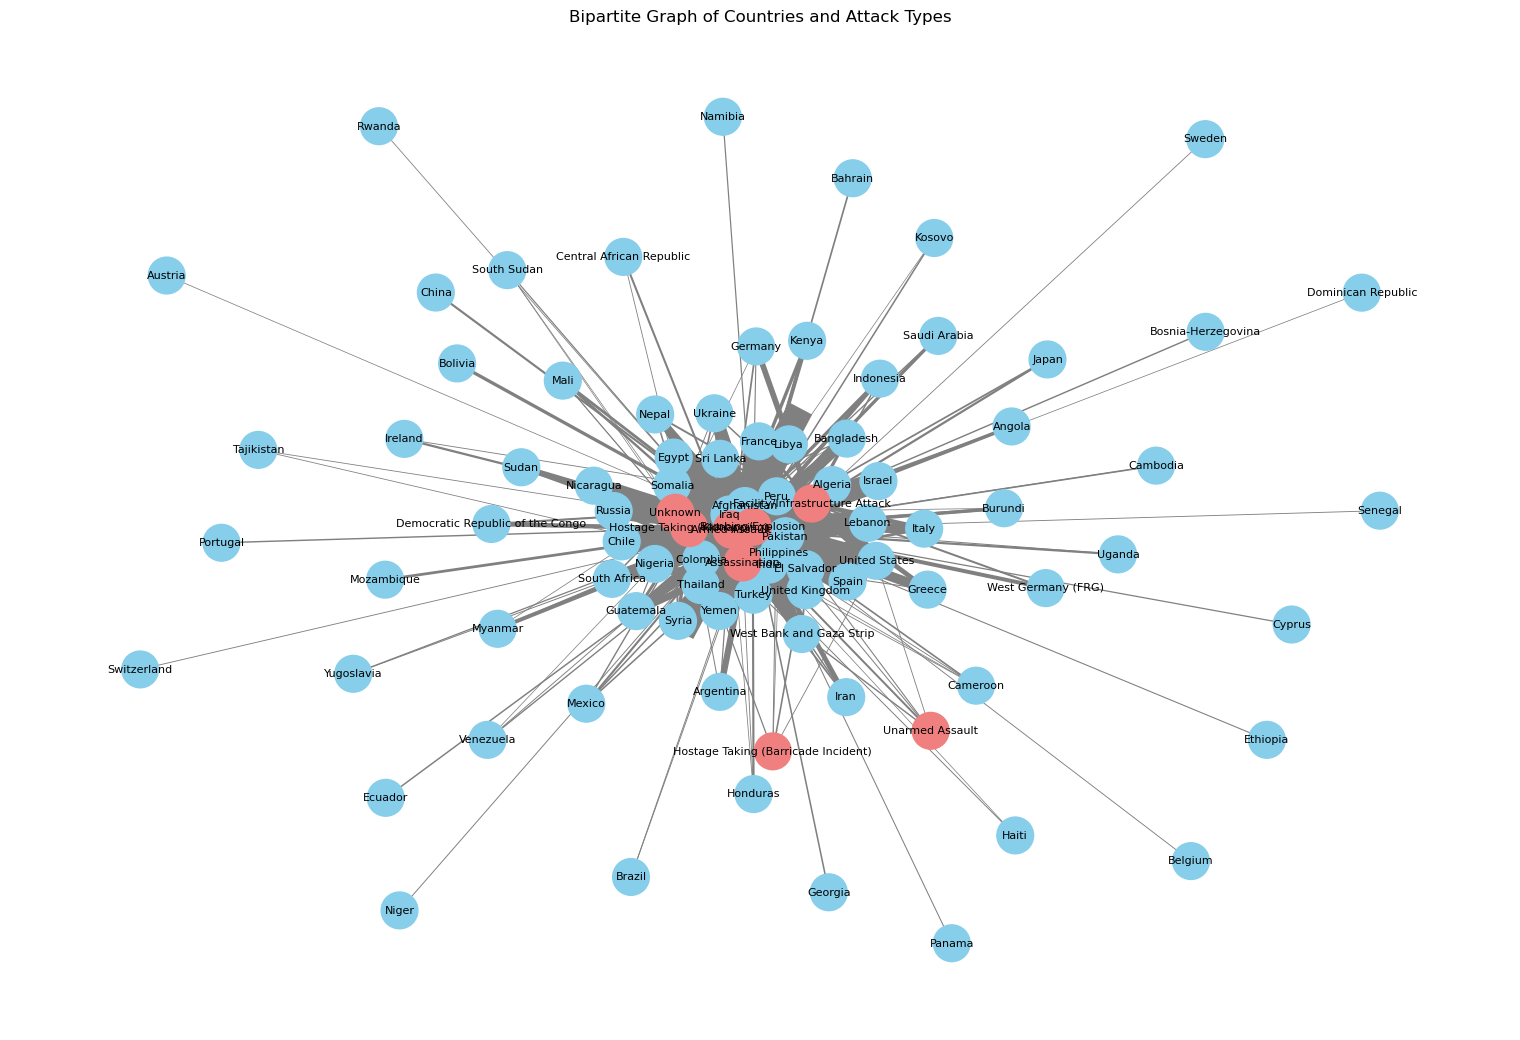

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

# Prepare data for a bipartite graph (e.g., Country and Attack Type)
edges = df[['country_txt', 'attacktype1_txt']].dropna().value_counts().reset_index(name='weight')
edges = edges[edges['weight'] > 50]  # Filter to focus on significant connections

# Initialize bipartite graph
B = nx.Graph()

# Add nodes with bipartite attribute
countries = list(edges['country_txt'].unique())
attack_types = list(edges['attacktype1_txt'].unique())
B.add_nodes_from(countries, bipartite=0)
B.add_nodes_from(attack_types, bipartite=1)

# Add weighted edges
for _, row in edges.iterrows():
    B.add_edge(row['country_txt'], row['attacktype1_txt'], weight=row['weight'])

# Draw bipartite graph
pos = nx.spring_layout(B, k=0.5, seed=42)
plt.figure(figsize=(15, 10))
nx.draw(B, pos, with_labels=True, node_size=700, font_size=8, node_color=['skyblue' if node in countries else 'lightcoral' for node in B.nodes()],
        edge_color='gray', width=[B[u][v]['weight'] * 0.01 for u, v in B.edges()])
plt.title('Bipartite Graph of Countries and Attack Types')
plt.show()

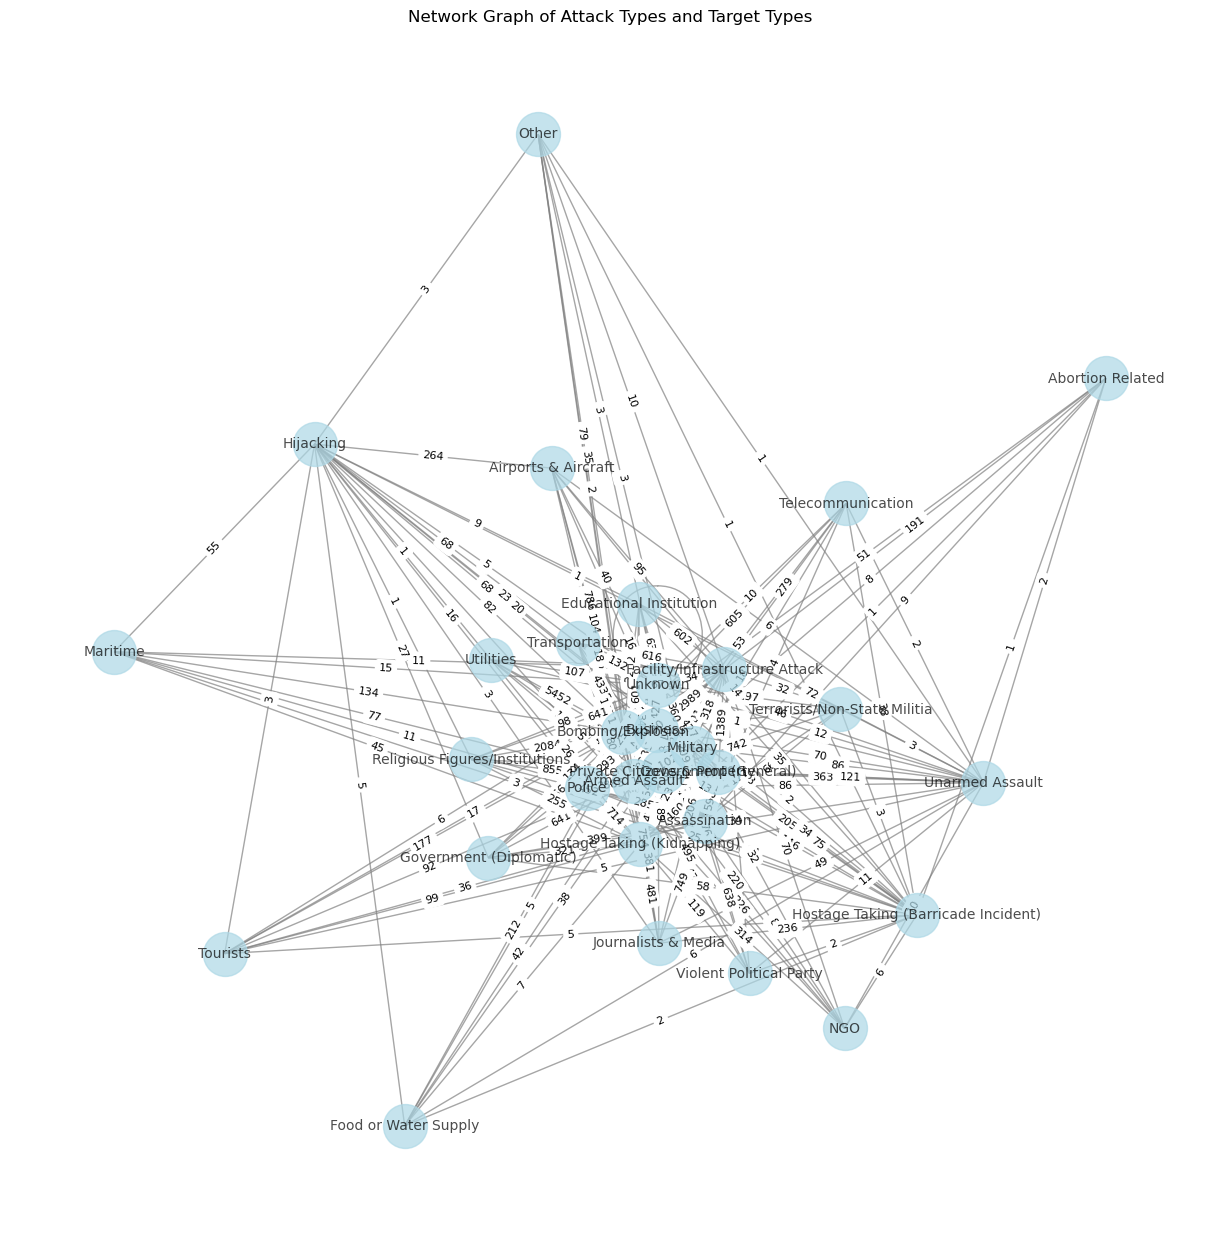

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

# Create edges based on attack types and target types
edges = df[['attacktype1_txt', 'targtype1_txt']].dropna().value_counts().reset_index(name='weight')

# Initialize directed graph
G = nx.from_pandas_edgelist(edges, 'attacktype1_txt', 'targtype1_txt', edge_attr=True)

# Plot
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, node_color='lightblue', edge_color='gray', alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_size=8)
plt.title('Network Graph of Attack Types and Target Types')
plt.show()